# Eka Suwandi Yuliantho - 0706022210037

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
#import libraries

In [101]:
#load the datasets
df = pd.read_csv('https://raw.githubusercontent.com/ihavenonamesad/Adult-Income_Dataset/refs/heads/main/adult.csv')

df.sample(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
8823,20,Private,60639,Some-college,10,Never-married,Other-service,Not-in-family,White,Female,0,0,40,United-States,<=50K
29334,24,State-gov,163480,Masters,14,Never-married,Adm-clerical,Not-in-family,Black,Female,0,0,40,United-States,<=50K
29039,47,Private,121836,Masters,14,Married-civ-spouse,Adm-clerical,Wife,White,Female,7688,0,38,United-States,>50K
25891,37,Private,343721,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,>50K
6052,41,Self-emp-inc,277858,Bachelors,13,Widowed,Exec-managerial,Not-in-family,Black,Female,0,0,45,United-States,<=50K
5051,39,Private,56962,Some-college,10,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,43,United-States,>50K
41233,24,Private,230248,7th-8th,4,Separated,Machine-op-inspct,Own-child,White,Male,0,0,40,United-States,<=50K
15371,27,Private,211032,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
25695,62,Private,183735,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,<=50K
29728,18,?,184101,Some-college,10,Never-married,?,Own-child,White,Male,0,0,25,United-States,<=50K


In [22]:
#show the info of the datasets
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [102]:
#show the description for the numerical values of the dataset
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [103]:
#drop the nulls in the datasets
df.dropna(inplace=True)
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

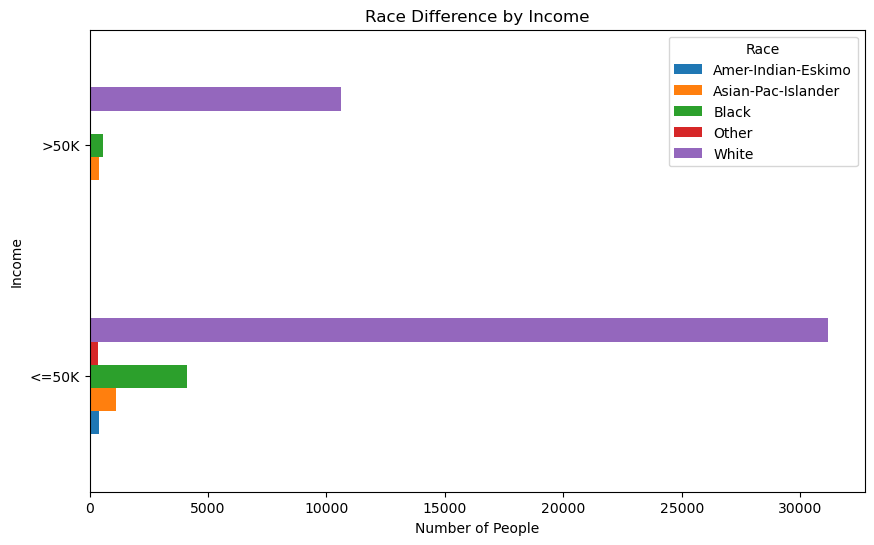

In [106]:
#boxplot
count_type_by_quality = df.groupby(['income','race'])['race'].count().unstack()
count_type_by_quality.plot (kind='barh',figsize=(10,6))

plt.title('Race Difference by Income')
plt.ylabel('Income')
plt.xlabel('Number of People')
plt.legend(title='Race')
plt.show()
#this graph explains that white people earn more than other races, but we can see that a lot they also earn less than 50k. Leading to the datasets mostly taken from the white people

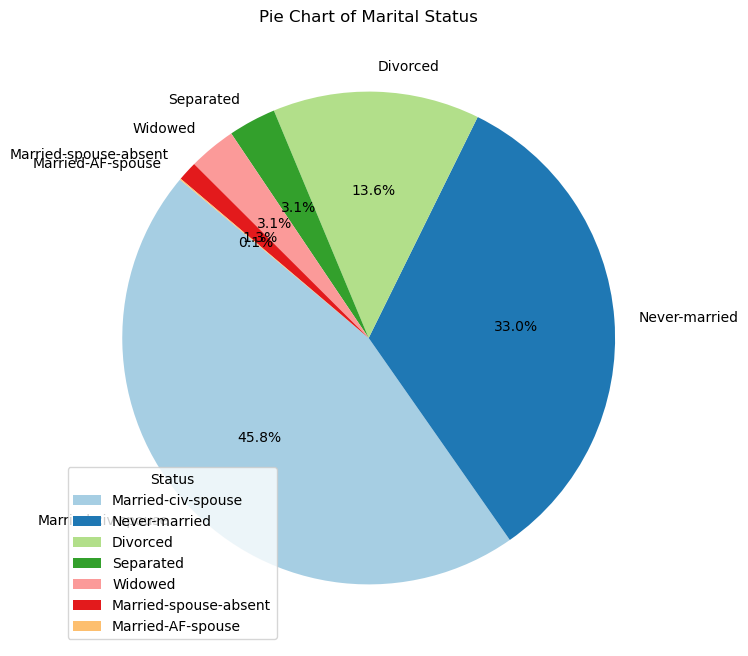

In [45]:
#boxplot
value_counts = df['marital-status'].value_counts()

# Plot
plt.figure(figsize=(8, 8))
plt.pie(value_counts.values, labels=value_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Pie Chart of Marital Status' )
plt.legend(title='Status')
plt.show()
#this graph explains married people are better than other people who's not married or 'separated'.

C:\Users\ekasu\AppData\Local\Temp\ipykernel_38692\2727240871.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


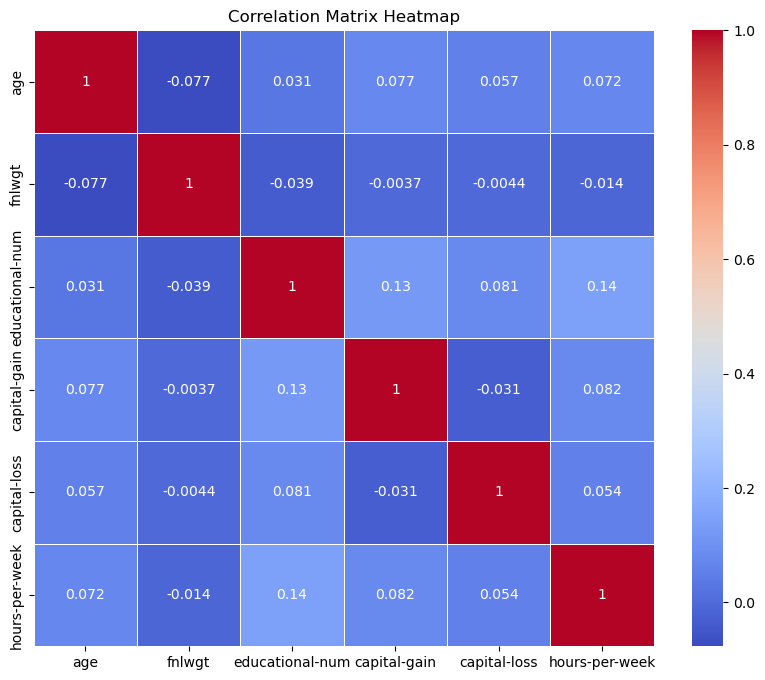

In [107]:
#Heatmap
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [108]:
#Import string value to float using the chosen columns
df['race'] = df['race'].replace({'White': 1, 'Black': 2, 'Asian-Pac-Islander': 3, 'Other': 4, 'Amer-Indian-Eskimo':5}).astype(float)
df['gender'] = df['gender'].replace({'Male': 1, 'Female': 2}).astype(float)

In [109]:
# Assign predictors and target variable
X = df[['race', 'educational-num', 'gender']].values
y = df['income'].values

In [110]:
#split the x and y to test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [111]:
#see the shape of the both x of train and test
X_train.shape, X_test.shape

((39073, 3), (9769, 3))

## Decision Tree

In [112]:
# import library
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [113]:
# a. Define Model
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [114]:
# b. Predict the test set results
y_pred_en = clf_en.predict(X_test)

In [115]:
# c. Check Accuracy Score
print("Model accuracy score with criterion entropy: {0:0.4f}".format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with criterion entropy: 0.7869


In [116]:
# d. Check for overfitting and underfitting
print("Training set score: {:0.4f}".format(clf_en.score(X_train, y_train)))

Training set score: 0.7854


[Text(0.5, 0.875, 'x[1] <= 12.5\nentropy = 0.796\nsamples = 39073\nvalue = [29676, 9397]'),
 Text(0.25, 0.625, 'x[2] <= 1.5\nentropy = 0.636\nsamples = 29401\nvalue = [24680, 4721]'),
 Text(0.125, 0.375, 'x[1] <= 8.5\nentropy = 0.74\nsamples = 19326\nvalue = [15278, 4048]'),
 Text(0.0625, 0.125, 'entropy = 0.382\nsamples = 3529\nvalue = [3267, 262]'),
 Text(0.1875, 0.125, 'entropy = 0.794\nsamples = 15797\nvalue = [12011, 3786]'),
 Text(0.375, 0.375, 'x[1] <= 8.5\nentropy = 0.354\nsamples = 10075\nvalue = [9402, 673]'),
 Text(0.3125, 0.125, 'entropy = 0.113\nsamples = 1592\nvalue = [1568, 24]'),
 Text(0.4375, 0.125, 'entropy = 0.39\nsamples = 8483\nvalue = [7834, 649]'),
 Text(0.75, 0.625, 'x[2] <= 1.5\nentropy = 0.999\nsamples = 9672\nvalue = [4996, 4676]'),
 Text(0.625, 0.375, 'x[1] <= 13.5\nentropy = 0.984\nsamples = 6813\nvalue = [2900, 3913]'),
 Text(0.5625, 0.125, 'entropy = 1.0\nsamples = 4420\nvalue = [2171, 2249]'),
 Text(0.6875, 0.125, 'entropy = 0.887\nsamples = 2393\nvalue 

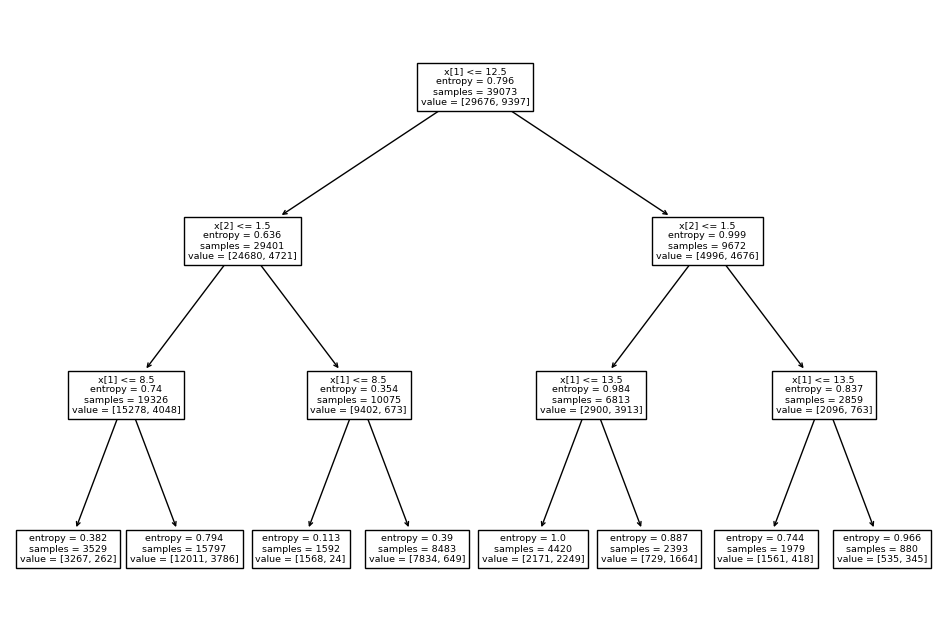

In [117]:
# e. Visualize decision trees
plt.figure(figsize=(12,8))
tree.plot_tree(clf_en.fit(X_train, y_train))

2. Criterion Gini Index

In [118]:
# a. Define Model
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [119]:
# b. Predict the test set results
y_pred_gini = clf_gini.predict(X_test)

In [120]:
# c. Check Accuracy Score
print("Model accuracy score with gini index: {0:0.4f}".format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with gini index: 0.7869


In [121]:
# d. Check for overfitting and underfitting
print("Training set score: {:0.4f}".format(clf_gini.score(X_train, y_train)))

Training set score: 0.7854


[Text(0.5, 0.875, 'x[1] <= 12.5\ngini = 0.365\nsamples = 39073\nvalue = [29676, 9397]'),
 Text(0.25, 0.625, 'x[2] <= 1.5\ngini = 0.27\nsamples = 29401\nvalue = [24680, 4721]'),
 Text(0.125, 0.375, 'x[1] <= 8.5\ngini = 0.331\nsamples = 19326\nvalue = [15278, 4048]'),
 Text(0.0625, 0.125, 'gini = 0.137\nsamples = 3529\nvalue = [3267, 262]'),
 Text(0.1875, 0.125, 'gini = 0.364\nsamples = 15797\nvalue = [12011, 3786]'),
 Text(0.375, 0.375, 'x[1] <= 10.5\ngini = 0.125\nsamples = 10075\nvalue = [9402, 673]'),
 Text(0.3125, 0.125, 'gini = 0.111\nsamples = 8994\nvalue = [8464, 530]'),
 Text(0.4375, 0.125, 'gini = 0.23\nsamples = 1081\nvalue = [938, 143]'),
 Text(0.75, 0.625, 'x[2] <= 1.5\ngini = 0.499\nsamples = 9672\nvalue = [4996, 4676]'),
 Text(0.625, 0.375, 'x[1] <= 13.5\ngini = 0.489\nsamples = 6813\nvalue = [2900, 3913]'),
 Text(0.5625, 0.125, 'gini = 0.5\nsamples = 4420\nvalue = [2171, 2249]'),
 Text(0.6875, 0.125, 'gini = 0.424\nsamples = 2393\nvalue = [729, 1664]'),
 Text(0.875, 0.375

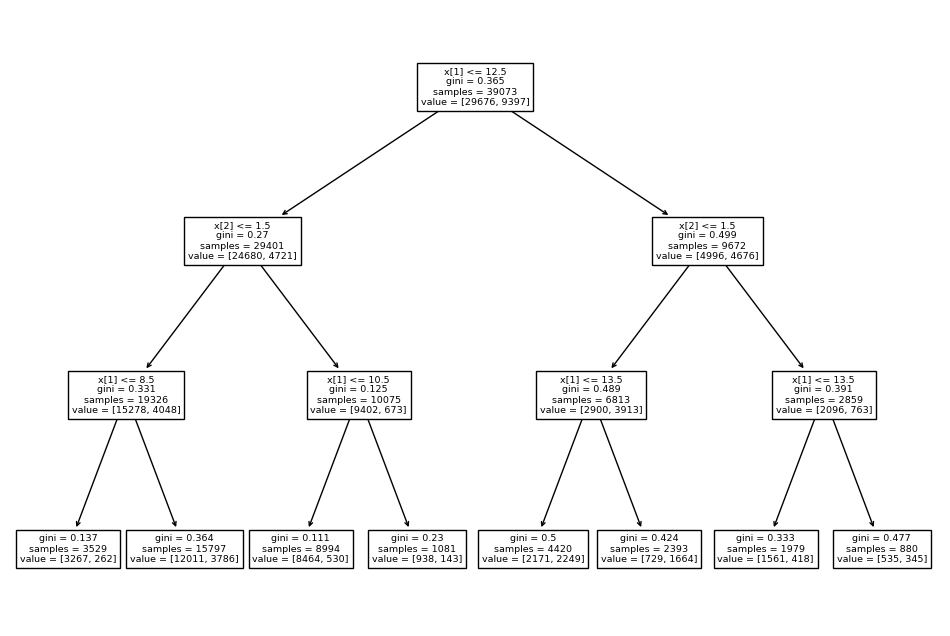

In [122]:
# e. Visualize decision trees
plt.figure(figsize=(12,8))
tree.plot_tree(clf_gini.fit(X_train, y_train))

Entropy


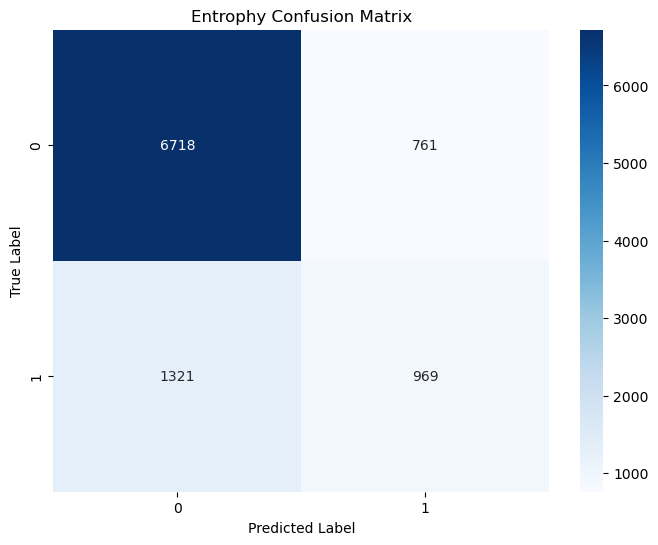


Gini Index


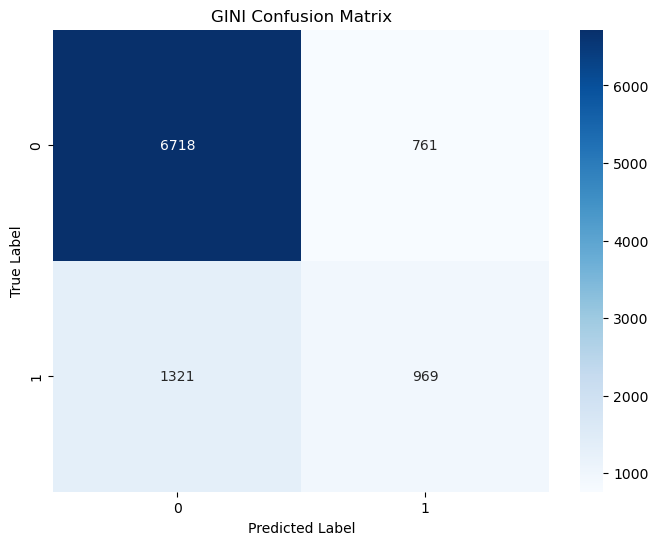

In [123]:
# f. Confusion Matrix

print("Entropy")
cm = confusion_matrix(y_test, y_pred_en)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Entrophy Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

print("Gini Index")

cm = confusion_matrix(y_test, y_pred_gini)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("GINI Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [86]:
# g. Classification Report
print("Entropy")
print(classification_report(y_test, y_pred_en))
print()
print("Gini Index")
print(classification_report(y_test, y_pred_gini))

Entropy
              precision    recall  f1-score   support

       <=50K       0.84      0.90      0.87      7479
        >50K       0.56      0.42      0.48      2290

    accuracy                           0.79      9769
   macro avg       0.70      0.66      0.67      9769
weighted avg       0.77      0.79      0.78      9769


Gini Index
              precision    recall  f1-score   support

       <=50K       0.84      0.90      0.87      7479
        >50K       0.56      0.42      0.48      2290

    accuracy                           0.79      9769
   macro avg       0.70      0.66      0.67      9769
weighted avg       0.77      0.79      0.78      9769



In [87]:
print("Both models perform the same and have the same results")
print("This means that both Gini and Entropy metric's will provide a consistent and valid basis for making decisions")

Both models perform the same and have the same results
This means that both Gini and Entropy metric's will provide a consistent and valid basis for making decisions


## Naive Bayes

In [88]:
#import library naive bayes
from sklearn.naive_bayes import GaussianNB

In [89]:
#fit the X train and y train to predict
nb_classifer = GaussianNB()
nb_classifer.fit(X_train, y_train)

GaussianNB()

In [90]:
#predict using X test
nb_y_pred = nb_classifer.predict(X_test)

In [91]:
#see the accuracy score with Naive Bayes
print("Model accuracy score with Naive Bayes: {0:0.4f}".format(accuracy_score(y_test, nb_y_pred)))

Model accuracy score with Naive Bayes: 0.7845


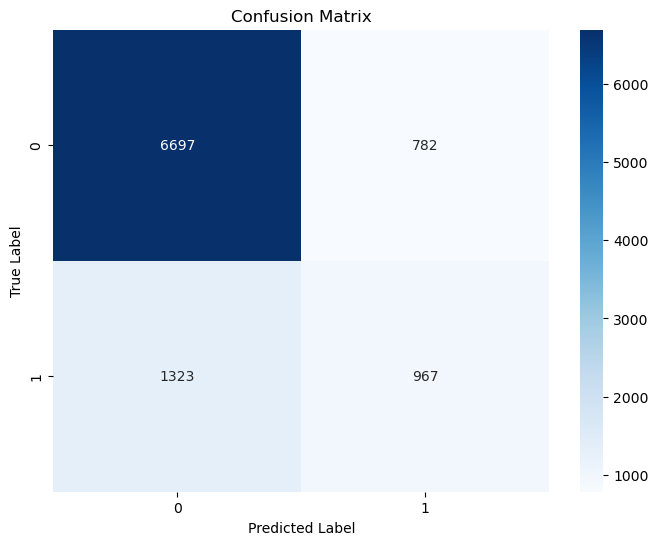

In [92]:
#see the confusion matrix with naive bayes
cm_nb = confusion_matrix(y_test, nb_y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [93]:
#Classification Report of the datasets
print(classification_report(y_test, nb_y_pred))

              precision    recall  f1-score   support

       <=50K       0.84      0.90      0.86      7479
        >50K       0.55      0.42      0.48      2290

    accuracy                           0.78      9769
   macro avg       0.69      0.66      0.67      9769
weighted avg       0.77      0.78      0.77      9769



In [ ]:
print("the accuracy of naive bayes is lower than decision tree's entropy and gini, so we can say that decision tree's are better than naive bayes on this one")

## K-NN

In [124]:
#fit the x and y train to the KNN
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [125]:
#predict the x test using the knn classifier
y_pred_knn = knn_classifier.predict(X_test)

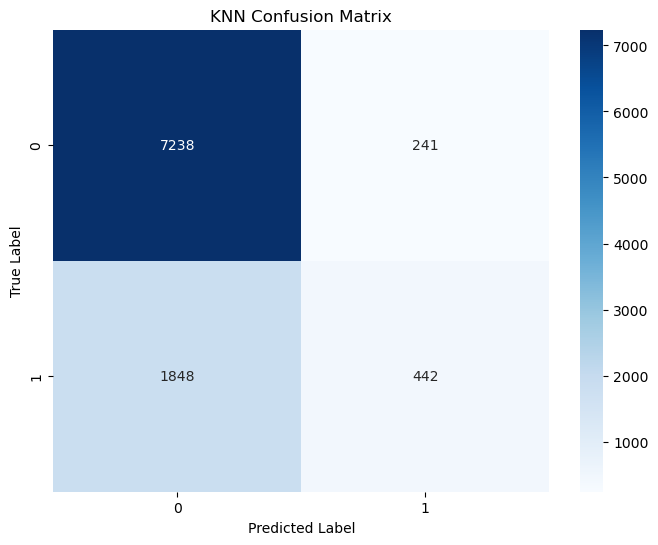

In [126]:
#confusion matrix of the knn
cm_knn = confusion_matrix(y_test, y_pred_knn)
accuracy_knn = accuracy_score(y_test, y_pred_knn)

plt.figure(figsize=(8,6))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues')
plt.title("KNN Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [127]:
#show the accuracy score of knn
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("Accuracy Score using K-Nearest Neighbors:", accuracy_knn)

Accuracy Score using K-Nearest Neighbors: 0.7861603029992834


In [128]:
#show classification report
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

       <=50K       0.80      0.97      0.87      7479
        >50K       0.65      0.19      0.30      2290

    accuracy                           0.79      9769
   macro avg       0.72      0.58      0.59      9769
weighted avg       0.76      0.79      0.74      9769



In [ ]:
print("The accuracy of KNN is the same as decision tree's of entropy and gini, so we can use both of them for safety measures")